In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
import pandas as pd
import plotly.express as px
import plotly.io as pio
# Set default template for Plotly
pio.templates.default = "plotly_white"

In [28]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv('Instagram_data.csv', encoding='utf-8')
except UnicodeDecodeError:
    # Try with different encoding if utf-8 fails
    try:
        df = pd.read_csv('Instagram_data.csv', encoding='latin1')
    except UnicodeDecodeError:
        # Try with another encoding if latin1 fails
        df = pd.read_csv('Instagram_data.csv', encoding='ISO-8859-1')


In [29]:
df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [30]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [31]:
df.describe() 

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [32]:
df.columns 

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [33]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [34]:
 df.duplicated().sum() 

17

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [37]:
# Q.2: Show descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    102.000000    102.000000     102.000000    102.000000   102.000000   
mean    5920.254902   2496.911765    1968.284314   1178.568627   184.549020   
std     5139.888111   1588.377397    1977.298128   2797.212621   309.096051   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3556.000000   1923.750000     753.000000    178.750000    40.250000   
50%     4343.500000   2216.000000    1326.000000    337.000000    75.000000   
75%     6296.250000   2605.250000    2415.750000    728.500000   218.500000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   102.000000  102.000000  102.000000  102.000000      102.000000   
mean    156.549020    6.352941    9.303922  176.823529       54.666667   
std     157.770332    3.308097   10.15014

In [38]:
# Q.3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [39]:
# Q.4: Distribution of Impressions
fig = px.histogram(df, x='Impressions', title='Distribution of Impressions')
fig.show()

In [40]:
print(df.columns)


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [41]:
# Set default plotly template
pio.templates.default = "plotly_white"
# Plot the distribution of impressions based on where they come from
fig = px.box(df, x='Impressions', y=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
             title='Distribution of Impressions across Different Sources',
             labels={'value': 'Impressions', 'variable': 'Source'})
fig.show()


In [47]:
# Set default plotly template
pio.templates.default = "plotly_white"
# Create line graphs for Likes, Saves, and Follows over the sequential index of posts
fig_likes = px.line(df, x=df.index, y='Likes', title='Likes Over Sequential Index',
                    labels={'x': 'Sequential Index', 'y': 'Likes'})
fig_saves = px.line(df, x=df.index, y='Saves', title='Saves Over Sequential Index',
                    labels={'x': 'Sequential Index', 'y': 'Saves'})
fig_follows = px.line(df, x=df.index, y='Follows', title='Follows Over Sequential Index',
                      labels={'x': 'Sequential Index', 'y': 'Follows'})

# Show the plots
fig_likes.show()
fig_saves.show()
fig_follows.show()


In [45]:
# Set default plotly template
pio.templates.default = "plotly_white"

# Create a figure with multiple traces (lines)
fig = go.Figure()

# Add trace for Likes
fig.add_trace(go.Scatter(x=df.index, y=df['Likes'], mode='lines', name='Likes', line=dict(color='blue')))

# Add trace for Saves
fig.add_trace(go.Scatter(x=df.index, y=df['Saves'], mode='lines', name='Saves', line=dict(color='green')))

# Add trace for Follows
fig.add_trace(go.Scatter(x=df.index, y=df['Follows'], mode='lines', name='Follows', line=dict(color='red')))

# Update layout
fig.update_layout(title='Metrics Over Sequential Index',
                  xaxis_title='Sequential Index',
                  yaxis_title='Count')

# Show the plot
fig.show()


In [48]:
# Set default plotly template
pio.templates.default = "plotly_white"
# Calculate the total reach from different sources
reach_from_sources = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

# Create a pie chart for the distribution of reach from different sources
fig = px.pie(values=reach_from_sources, names=reach_from_sources.index,
             title='Distribution of Reach from Different Sources')
# Show the plot
fig.show()


In [49]:
# Set default plotly template
pio.templates.default = "plotly_white"
# Calculate the total engagement from different sources
engagement_sources = df[['Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']].sum()
# Create a pie chart for the distribution of engagement sources
fig = px.pie(values=engagement_sources, names=engagement_sources.index,
             title='Distribution of Engagement Sources')
# Show the plot
fig.show()


In [50]:
# Set default plotly template
pio.templates.default = "plotly_white"
# Create a scatter plot with a trendline
fig = px.scatter(df, x='Profile Visits', y='Follows', title='Relationship between Profile Visits and Follows',
                 trendline='ols', labels={'Profile Visits': 'Profile Visits', 'Follows': 'Follows'})
# Show the plot
fig.show()


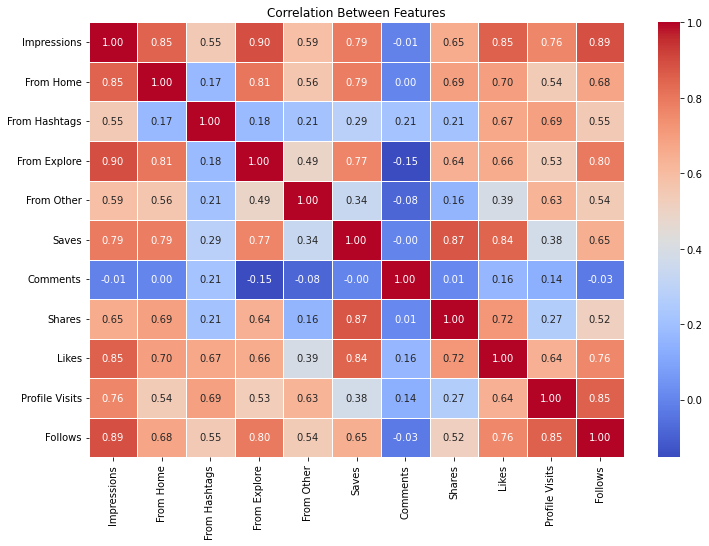

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()


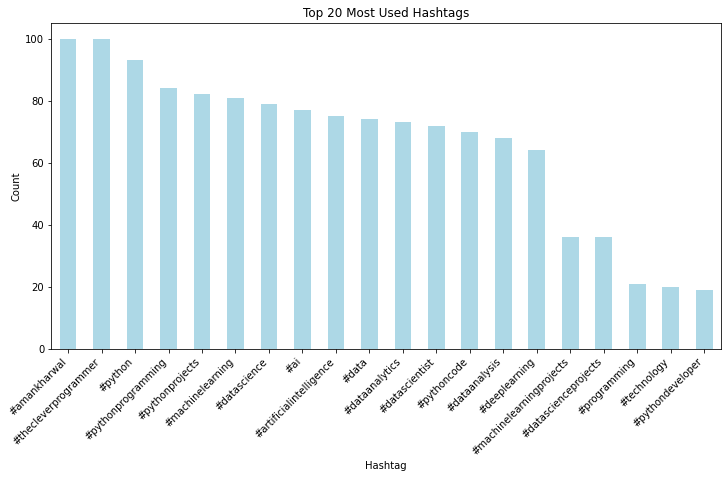

In [61]:
# Drop missing values in the 'Hashtags' column and split hashtags
hashtags = df['Hashtags'].dropna().str.split()

# Flatten the list of lists of hashtags
all_hashtags = [tag for sublist in hashtags for tag in sublist]

# Count the occurrences of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts()

# Plot the distribution of hashtags
plt.figure(figsize=(12, 6))
hashtag_counts.head(20).plot(kind='bar', color='lightblue')
plt.title('Top 20 Most Used Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
